# EDA project on **Health Care** Domain

In [1]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
path = 'C:/Users/sivas/stats/insurance.csv'

df = pd.read_csv(path)

In [3]:
df.shape

(1338, 7)

In [4]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [5]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# Univariate Analysis on various columns

## Analysis on Numerical Data

In [7]:
#Non viz analysis on column 'age'
 
min_age = df['age'].min()

max_age = df['age'].max()

mean_age = df['age'].mean()

med_age = df['age'].median()

std_age = df['age'].std()

In [8]:
print(min_age)
print(max_age)
print(mean_age)
print(med_age)
print(std_age)

18
64
39.20702541106129
39.0
14.049960379216172


<AxesSubplot:ylabel='Density'>

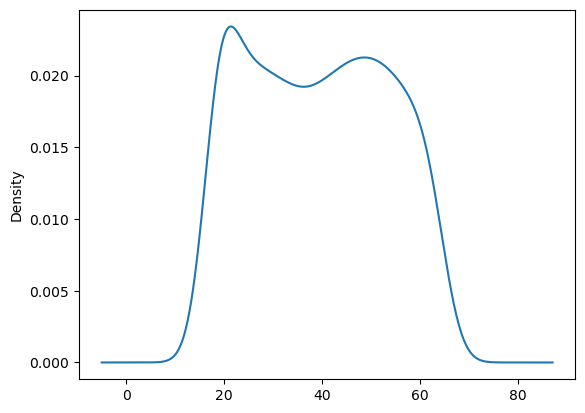

In [9]:
#To find the Distribution of 'age'
df['age'].plot(kind = 'kde')

<AxesSubplot:>

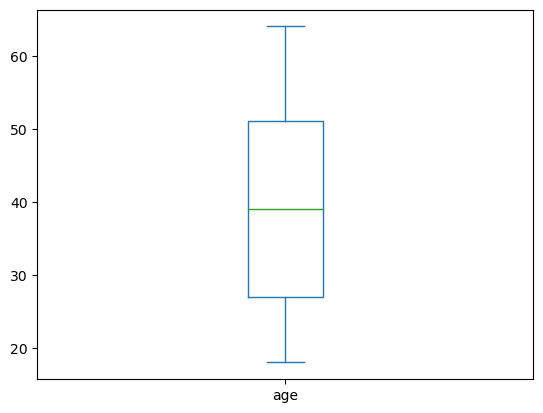

In [10]:
#To detect detect Outliers
df['age'].plot(kind = 'box')

((array([-3.28061069, -3.02161974, -2.87748242, ...,  2.87748242,
          3.02161974,  3.28061069]),
  array([18, 18, 18, ..., 64, 64, 64], dtype=int64)),
 (13.69123167012233, 39.20702541106129, 0.972734397110169))

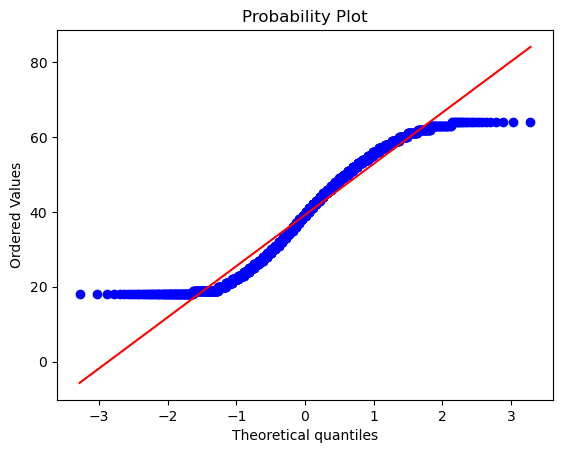

In [11]:
#to check the Normality 
stats.probplot(df['age'],dist = 'norm', plot = plt)

In [12]:
#non viz analysis on column 'bmi'
 
min_bmi = df['bmi'].min()

max_bmi = df['bmi'].max()

mean_bmi = df['bmi'].mean()

med_bmi = df['bmi'].median()

std_bmi = df['bmi'].std()

In [13]:
print(min_bmi)
print(max_bmi)
print(mean_bmi)
print(med_bmi)
print(std_bmi)

15.96
53.13
30.663396860986538
30.4
6.098186911679017


<AxesSubplot:ylabel='Density'>

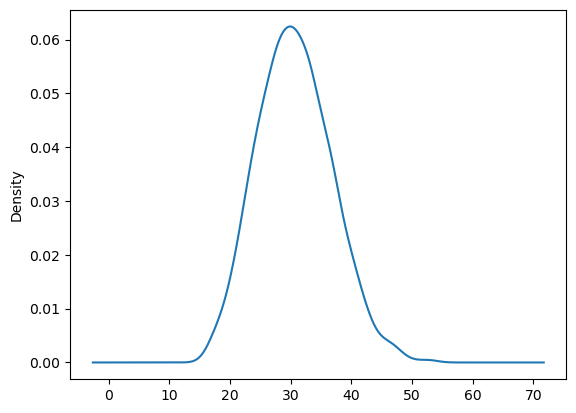

In [14]:
#To find the Distribution
df['bmi'].plot(kind = 'kde')

<AxesSubplot:>

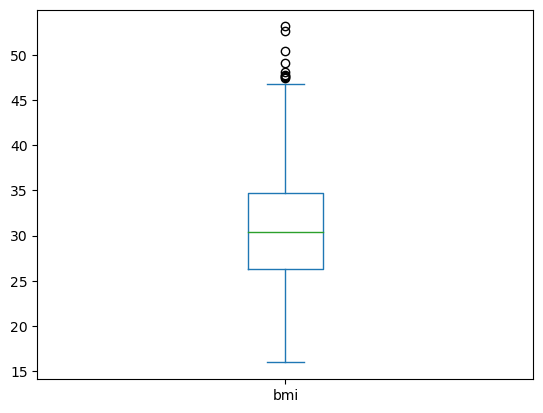

In [15]:
#To find outliers

df['bmi'].plot(kind = 'box')

((array([-3.28061069, -3.02161974, -2.87748242, ...,  2.87748242,
          3.02161974,  3.28061069]),
  array([15.96 , 16.815, 16.815, ..., 50.38 , 52.58 , 53.13 ])),
 (6.091222472679124, 30.66339686098655, 0.9970813289420968))

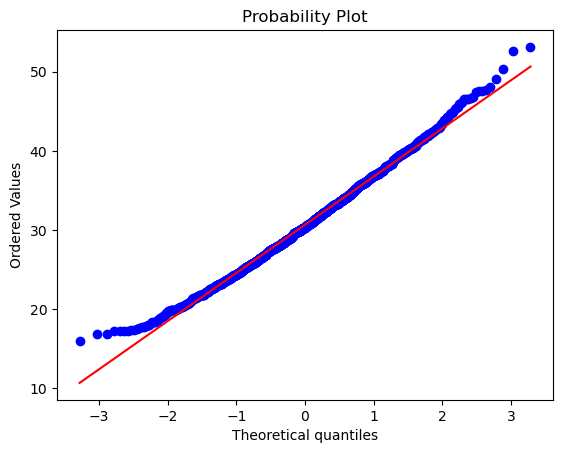

In [16]:
stats.probplot(df['bmi'],dist='norm',plot=plt)

In [17]:
# Outlier treatment on 'bmi' column with 1.5 IQR rule

bmi_q1 = df['bmi'].quantile(0.25)
bmi_q3 = df['bmi'].quantile(0.75)

bmi_IQR = bmi_q3 - bmi_q1

bmi_lower_bound = bmi_q1 - 1.5 * bmi_IQR
bmi_upper_bound = bmi_q3 + 1.5 * bmi_IQR

clean_df = df[(df['bmi'] > bmi_lower_bound) & (df['bmi'] < bmi_upper_bound)]

print("Before treating shape of df :", df.shape)
print("After treating shape of df :", clean_df.shape)

Before treating shape of df : (1338, 7)
After treating shape of df : (1329, 7)


In [18]:
print('min_bmi_after_treating :', clean_df['bmi'].min())

print('max_bmi_after_treating :', clean_df['bmi'].max())

print('mean_bmi_after_treating :', clean_df['bmi'].mean())

print('med_bmi_after_treating :', clean_df['bmi'].median())

print('std_bmi_after_treating :', clean_df['bmi'].std())

min_bmi_after_treating : 15.96
max_bmi_after_treating : 46.75
mean_bmi_after_treating : 30.53734762979683
med_bmi_after_treating : 30.3
std_bmi_after_treating : 5.919946435122974


<AxesSubplot:>

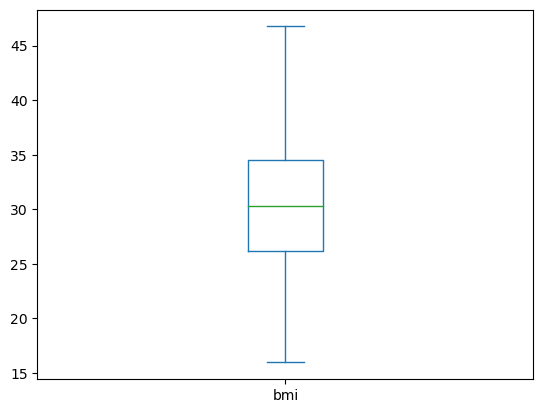

In [19]:
#recheck for outliers
clean_df['bmi'].plot(kind = 'box')

<AxesSubplot:ylabel='Density'>

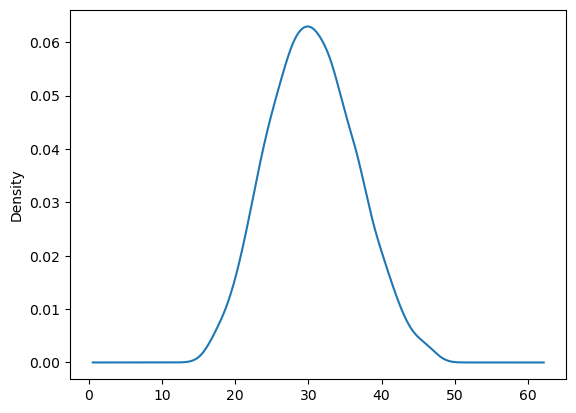

In [20]:
#distribution with clean_df
clean_df['bmi'].plot(kind = 'kde')

((array([-3.27870689, -3.01957648, -2.8753529 , ...,  2.8753529 ,
          3.01957648,  3.27870689]),
  array([15.96 , 16.815, 16.815, ..., 46.53 , 46.7  , 46.75 ])),
 (5.9182317820788155, 30.537347629796837, 0.9979219283413668))

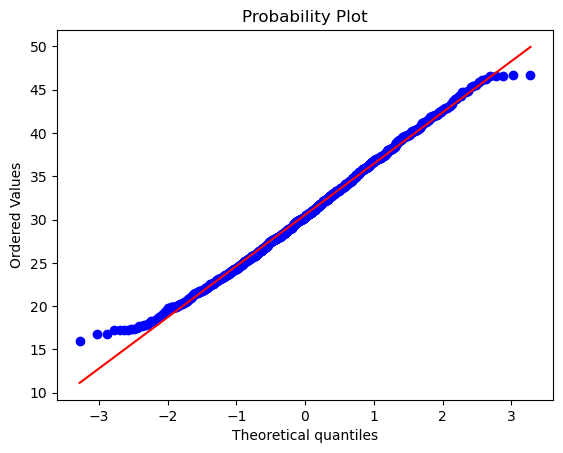

In [21]:
#Checking normality using QQ plot
stats.probplot(clean_df['bmi'],dist='norm',plot=plt)

In [22]:
#non viz analysis on column 'bmi'
 
min_no_of_childs = df['children'].min()

max_no_of_childs = df['children'].max()

mean_no_of_childs = df['children'].mean()

med_no_of_childs = df['children'].median()

std_no_of_childs = df['children'].std()

In [23]:
print(min_no_of_childs)
print(max_no_of_childs)
print(mean_no_of_childs)
print(med_no_of_childs)
print(std_no_of_childs)

0
5
1.0949177877429
1.0
1.2054927397819095


<AxesSubplot:>

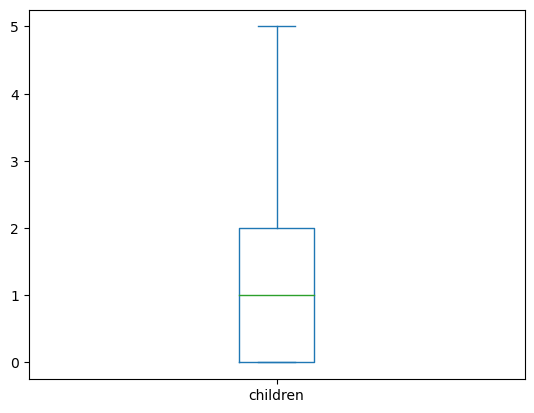

In [24]:
# Detecting outliers in column 'children'
df['children'].plot(kind = 'box')

<AxesSubplot:ylabel='Density'>

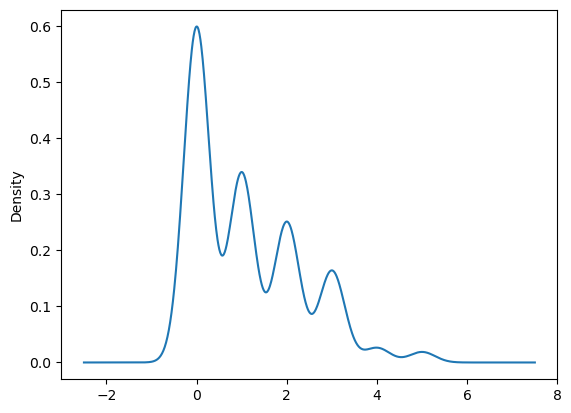

In [25]:
# Distribution Of column 'children'
df['children'].plot(kind = 'kde')

((array([-3.28061069, -3.02161974, -2.87748242, ...,  2.87748242,
          3.02161974,  3.28061069]),
  array([0, 0, 0, ..., 5, 5, 5], dtype=int64)),
 (1.0962307471439767, 1.0949177877429002, 0.907745769386336))

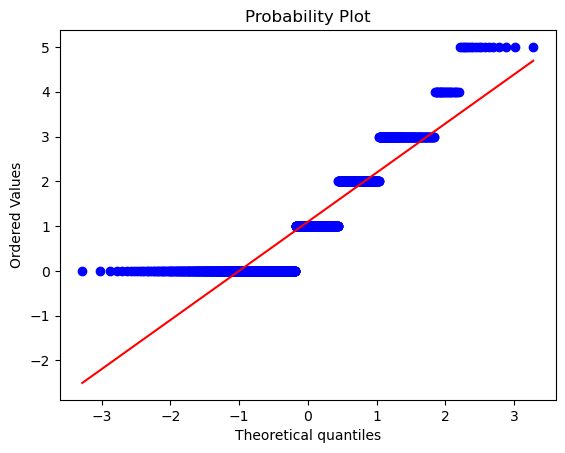

In [26]:
# Checking normality with QQ plot
stats.probplot(df['children'],dist='norm',plot=plt)

In [27]:
min_charge = df['charges'].min()

max_charge = df['charges'].max()

mean_charge = df['charges'].mean()

med_charge = df['charges'].median()

std_charge = df['charges'].std()

In [28]:
print(min_charge)
print(max_charge)
print(mean_charge)
print(med_charge)
print(std_charge)

1121.8739
63770.42801
13270.422265141257
9382.033
12110.011236693994


<AxesSubplot:ylabel='Density'>

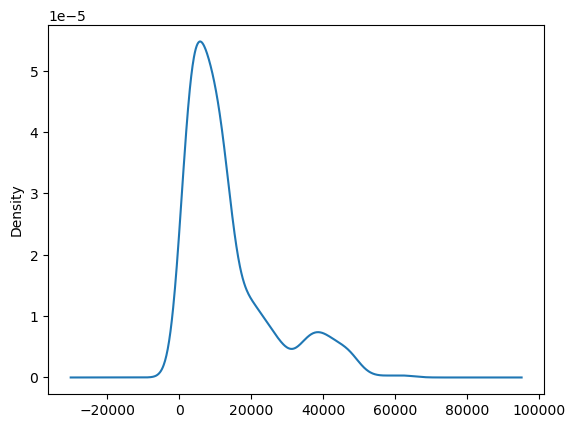

In [29]:
#disribution plot on column 'charges'
df['charges'].plot(kind = 'kde')

<AxesSubplot:>

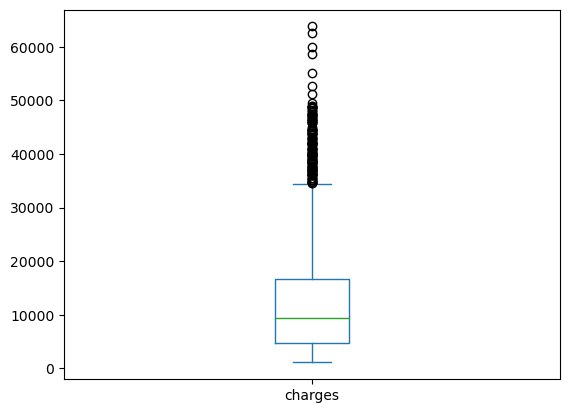

In [30]:
#detection of outliers
df['charges'].plot(kind = 'box')

((array([-3.28061069, -3.02161974, -2.87748242, ...,  2.87748242,
          3.02161974,  3.28061069]),
  array([ 1121.8739 ,  1131.5066 ,  1135.9407 , ..., 60021.39897,
         62592.87309, 63770.42801])),
 (10952.462526491305, 13270.422265141258, 0.9028052656368238))

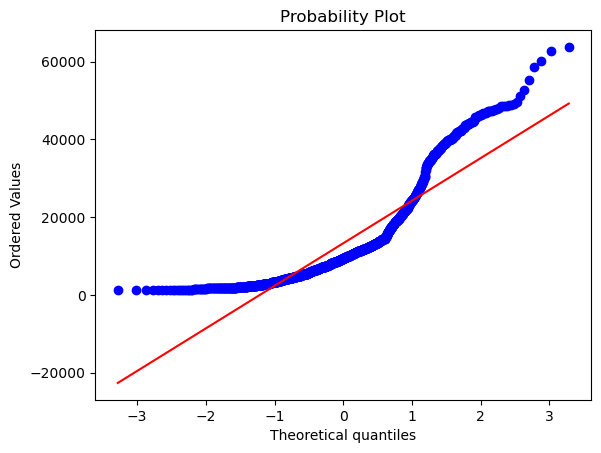

In [31]:
# Detction for normality with QQ plot
stats.probplot(df['charges'],dist='norm',plot=plt)

## Analysis on Categorical Data

In [32]:
# Non viz on column 'sex'
gen_cnt = clean_df['sex'].value_counts()
print(gen_cnt)

male      670
female    659
Name: sex, dtype: int64


<AxesSubplot:>

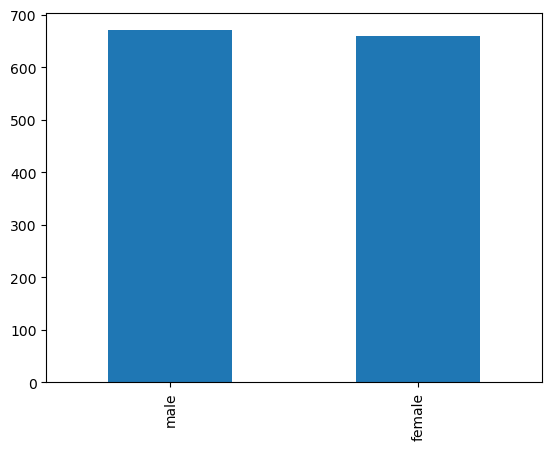

In [33]:
# viz analysis
# countplot on column 'sex'
clean_df['sex'].value_counts().plot(kind = 'bar')

In [34]:
# Non viz on column 'region'
reg_cnt = clean_df['region'].value_counts()
print(reg_cnt)

southeast    357
northwest    325
southwest    324
northeast    323
Name: region, dtype: int64


<AxesSubplot:>

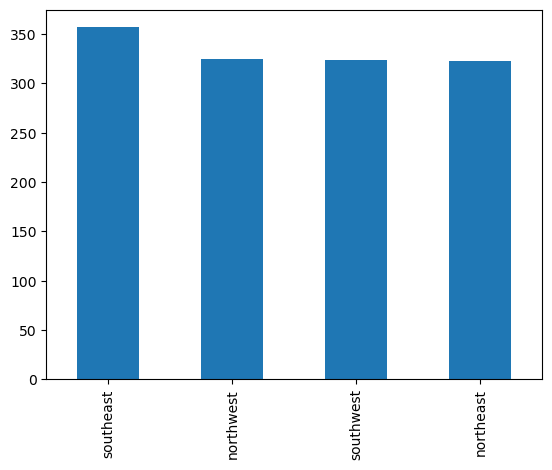

In [35]:
# viz analysis
# countplot on column 'region'
clean_df['region'].value_counts().plot(kind = 'bar')

In [36]:
# Non viz on column 'smoker'
smk_cnt = clean_df['smoker'].value_counts()
print(smk_cnt)

no     1058
yes     271
Name: smoker, dtype: int64


<AxesSubplot:>

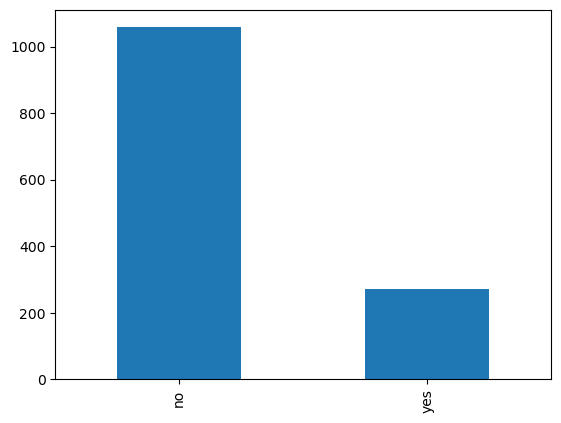

In [37]:
# viz analysis
# countplot on column 'smoker'
clean_df['smoker'].value_counts().plot(kind = 'bar')

# Bi-variate Analysis on various columns wrt to charges
## Numerical vs numerical ('scatter plots')

## 'age' vs 'charges'

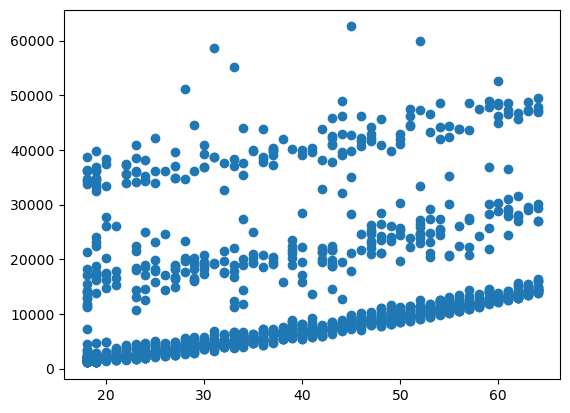

In [38]:
#viz analyisis to observe the co-relation
plt.scatter(x = clean_df['age'],y = clean_df['charges'])

#### Insight : As the age increases the charges increases, elder people paying having more expenses compared to youngster

## 'bmi' vs 'charges'

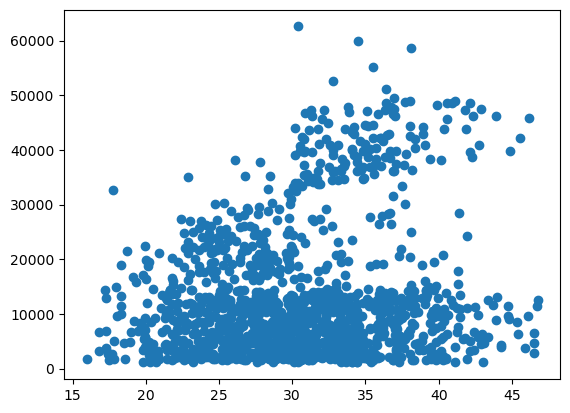

In [39]:
#viz analyisis to observe the co-relation
plt.scatter(x = clean_df['bmi'],y = clean_df['charges'])

#### Insight: There is slight relationship if we can observe some percentage of ppl who BMI is greater than 30 are facing more medical expenses

## 'children' vs 'charges'

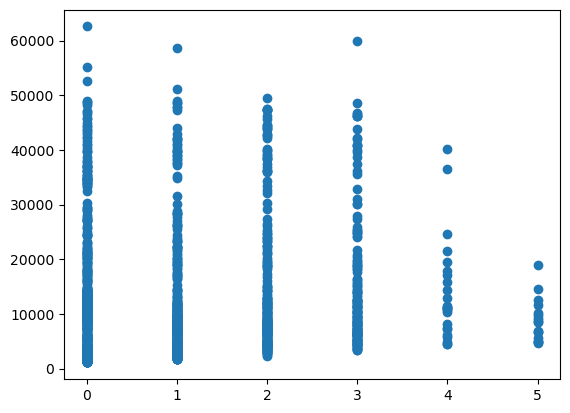

In [40]:
#viz analyisis to observe the co-relation
plt.scatter(x = clean_df['children'],y = clean_df['charges'])

#### Insight : No relatonship b/w both children and Charges

## Categorical vs Numerical(box plots)

# 'sex' vs 'charges'

<AxesSubplot:title={'center':'charges'}, xlabel='sex'>

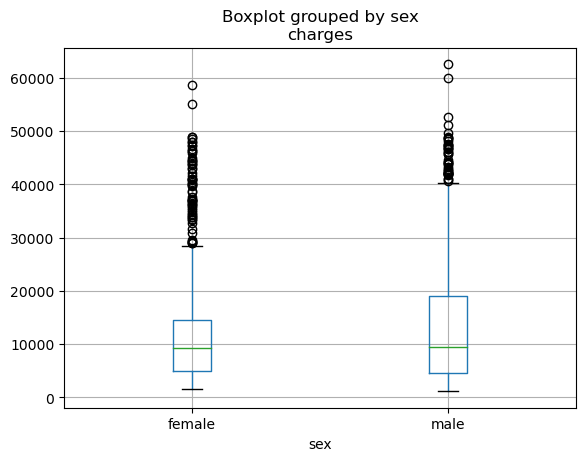

In [41]:
clean_df.boxplot(by='sex', column='charges')

#### Insight: NO relationship b/w gender and charges

## 'smoker' vs 'charges'

<AxesSubplot:title={'center':'charges'}, xlabel='smoker'>

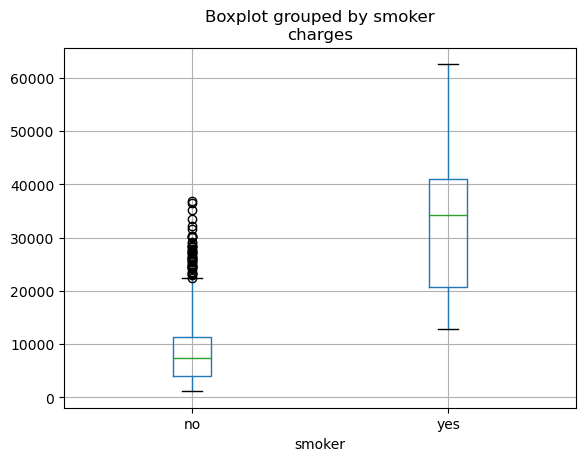

In [42]:
clean_df.boxplot(by='smoker', column='charges')

#### Insight : People who smoke's are spending more charges

## 'region' vs 'charges'

<AxesSubplot:title={'center':'charges'}, xlabel='region'>

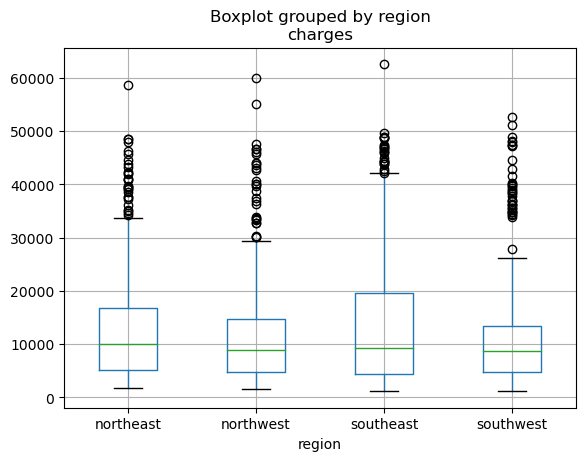

In [43]:
clean_df.boxplot(by='region', column='charges')

#### Insight : No relationship b/w region and charges

# Bi-variate Analysis on various columns wrt to 'charges'

In [ ]:
plt.scatter(x = clean_df['age'],y = clean_df['charges'])

In [ ]:
plt.scatter(x = clean_df['children'],y = clean_df['charges'])

In [ ]:
clean_df.boxplot(by='sex', column='charges')

In [ ]:
clean_df.boxplot(by='region', column='charges')